In [20]:
# 📓 Notebook 02 – Feature Engineering e Modelagem Inicial

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Carregar os dados limpos
file_path = "../data/dados_petr4.parquet"
df = pd.read_parquet(file_path)

In [10]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,6.612076,7.095887,6.532908,7.054836,104534800
2019-01-03,7.025514,7.277682,6.978599,7.227835,95206400
2019-01-04,7.286481,7.312871,7.175057,7.248362,72119800
2019-01-07,7.286480,7.600224,7.242497,7.362717,121711900
2019-01-08,7.447750,7.453614,7.263022,7.318733,68761800


In [11]:
# Criando features de defasagem (lags)
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag2'] = df['Close'].shift(2)
df['Close_lag3'] = df['Close'].shift(3)

In [12]:
# Criando médias móveis
df['ma_5'] = df['Close'].rolling(window=5).mean()
df['ma_10'] = df['Close'].rolling(window=10).mean()

In [13]:
# Removendo valores nulos gerados pelas novas features
df.dropna(inplace=True)

In [14]:
# Definindo X e y
y = df['Close']  # alvo: fechamento atual
X = df[['Close_lag1', 'Close_lag2', 'Close_lag3', 'ma_5', 'ma_10']]

In [15]:
# Normalização dos dados (evita influência desproporcional das variáveis)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

In [17]:
# Treinando modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
# Realizando previsões
y_pred = model.predict(X_test)

In [ ]:
# Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Avaliação do Modelo:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")


📊 Avaliação do Modelo:
RMSE: 0.31
MAE: 0.24
R²: 0.97


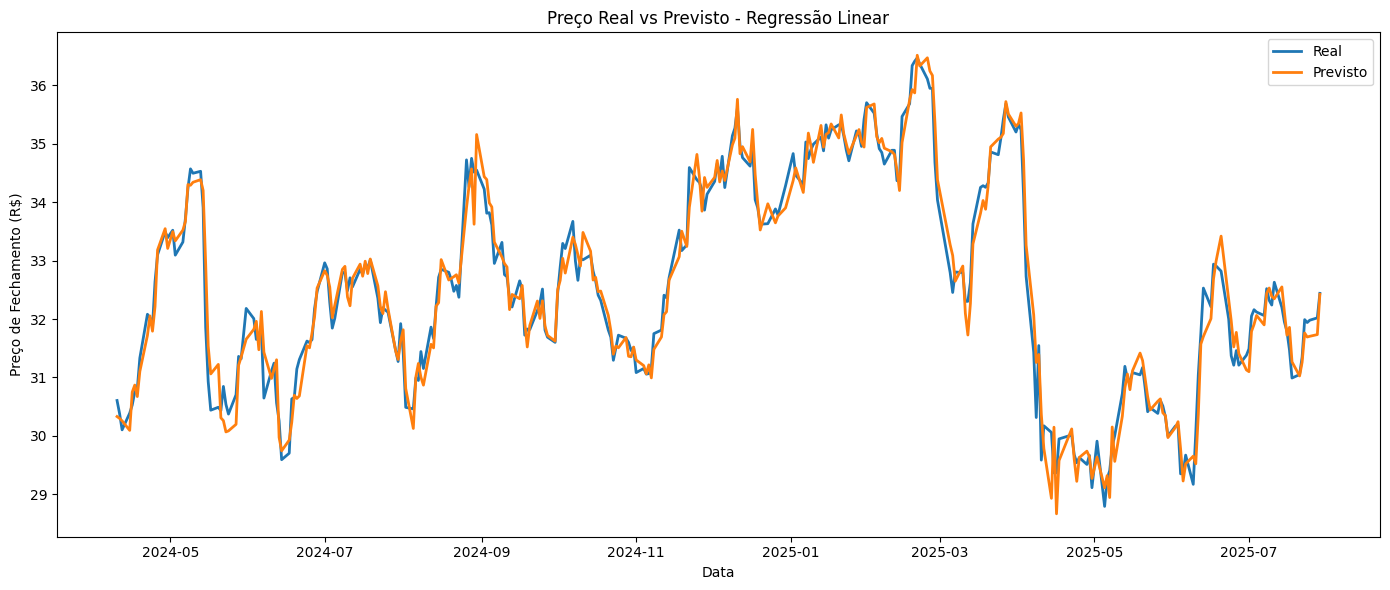

In [25]:
# Visualização das previsões
plt.figure(figsize=(14,6))
plt.plot(y_test.index, y_test.values, label="Real", linewidth=2)
plt.plot(y_test.index, y_pred, label="Previsto", linewidth=2)
plt.title("Preço Real vs Previsto - Regressão Linear")
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento (R$)")
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
# Salvando modelo e scaler
import joblib
joblib.dump(model, "../models/modelo_linear_petr4.joblib")
joblib.dump(scaler, "../models/scaler_petr4.joblib")
print("\n✅ Modelo e scaler salvos com sucesso.")


✅ Modelo e scaler salvos com sucesso.
